In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [3]:
df = pd.read_csv('mushroom_cleaned.csv')
df.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [7]:
#df['class'].nunique()
df['class'].unique()

array([1, 0], dtype=int64)

from above we have 2 classes in the ddependent column that need to be predicted -- so this is binary class classification problem

In [10]:
 # checking for null values -- and did not find any nulll values in the data 
df.isnull().sum()

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64

In [11]:
df.info() # data is of int and float type no character columns hence no need to do encoding

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [13]:
df.nunique().values # checking no of unique values for each column

array([1847,    7,    7,   12, 1455, 3510,   13,    4,    2], dtype=int64)

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cap-diameter,54035.0,567.257204,359.883763,0.000000,289.000000,525.000000,781.000000,1891.000000
cap-shape,54035.0,4.000315,2.160505,0.000000,2.000000,5.000000,6.000000,6.000000
gill-attachment,54035.0,2.142056,2.228821,0.000000,0.000000,1.000000,4.000000,6.000000
gill-color,54035.0,7.329509,3.200266,0.000000,5.000000,8.000000,10.000000,11.000000
stem-height,54035.0,0.759110,0.650969,0.000426,0.270997,0.593295,1.054858,3.835320
stem-width,54035.0,1051.081299,782.056076,0.000000,421.000000,923.000000,1523.000000,3569.000000
stem-color,54035.0,8.418062,3.262078,0.000000,6.000000,11.000000,11.000000,12.000000
season,54035.0,0.952163,0.305594,0.027372,0.888450,0.943195,0.943195,1.804273
class,54035.0,0.549181,0.497580,0.000000,0.000000,1.000000,1.000000,1.000000


Data Visualization

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt


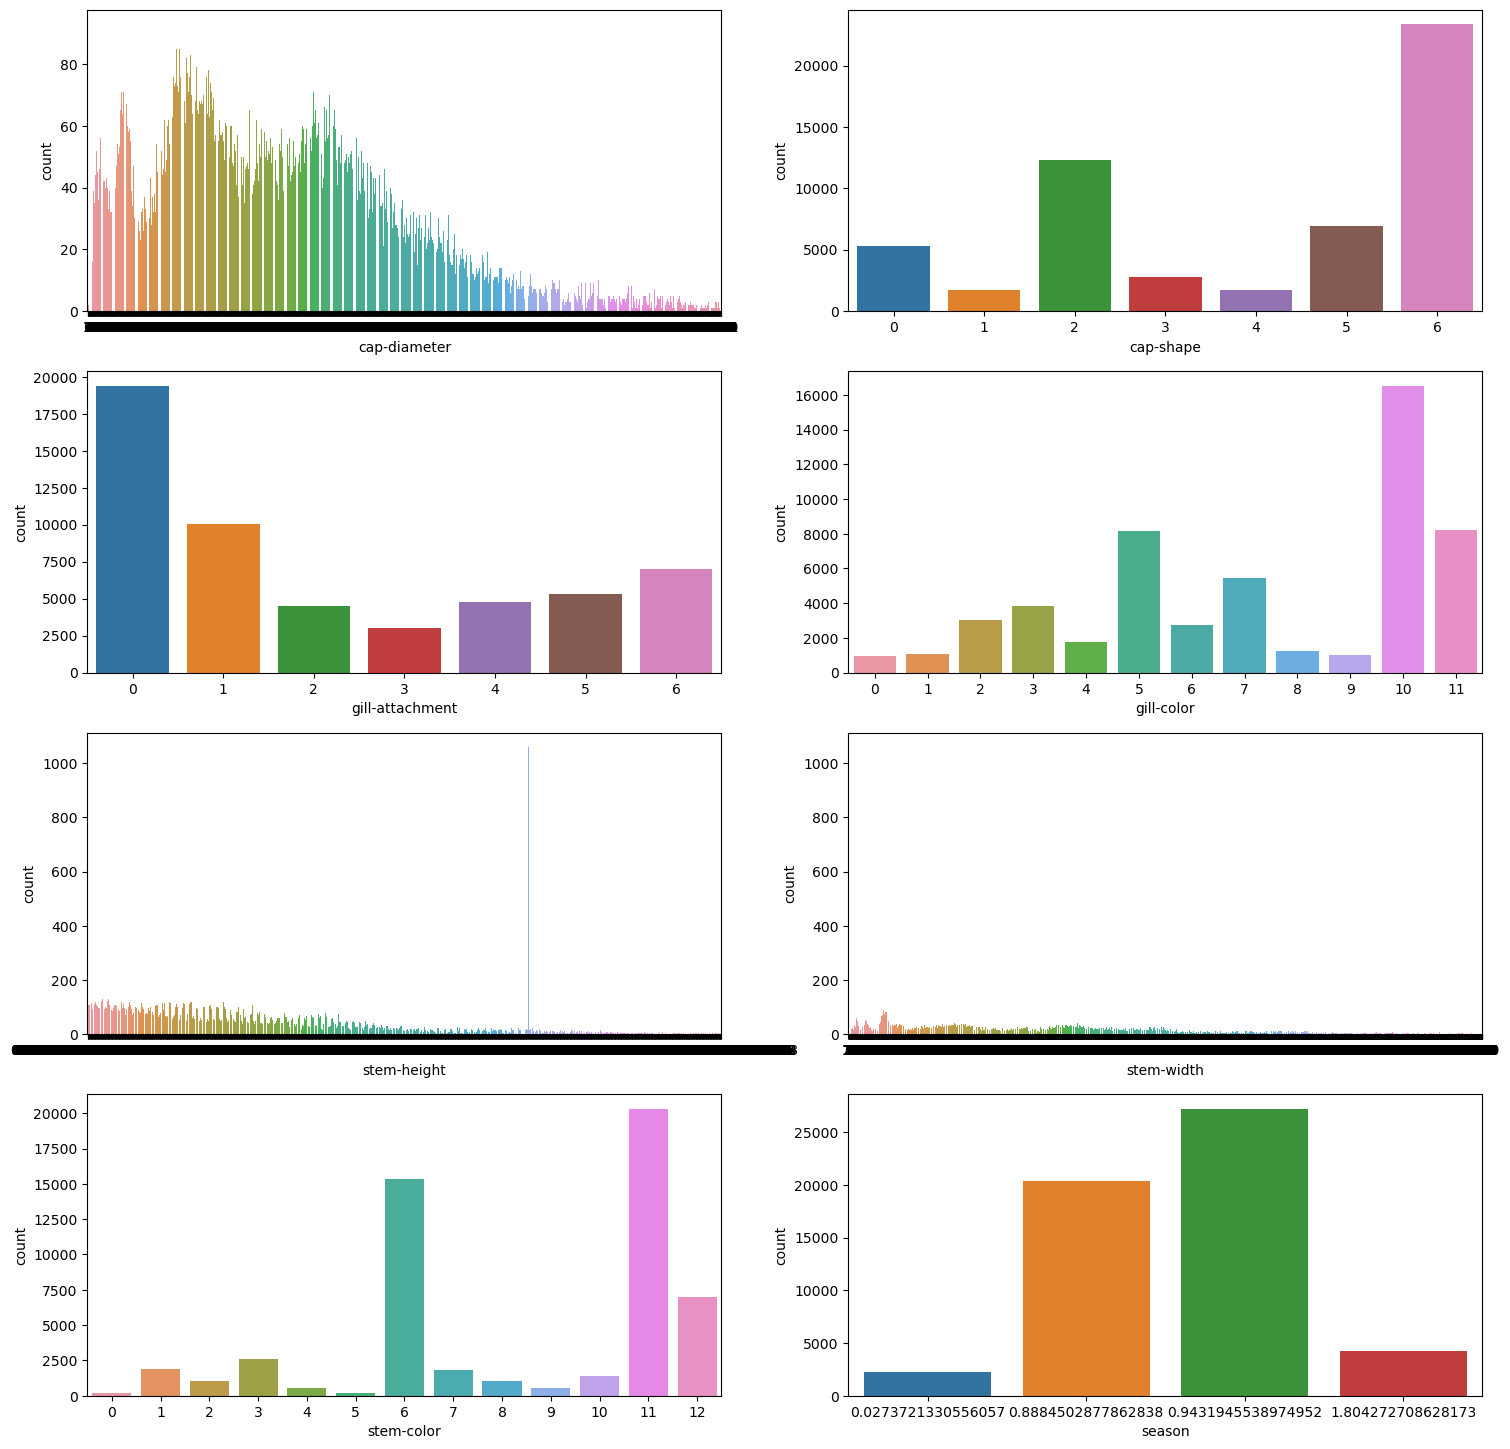

In [26]:
fig, ax = plt.subplots(4, 2, figsize = (18,18))

for col, ax in zip(df.columns, ax.flatten()):
    sns.countplot(data =df, x=col, ax = ax)


as there are so  many values in stem_height, stem_weight, cap_diameter columns ...count plot cannot yield accurate visualizations--so triying another types of plots

c:\Users\paish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\paish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\paish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\paish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

ValueError: num must be an integer with 1 <= num <= 4, not 5

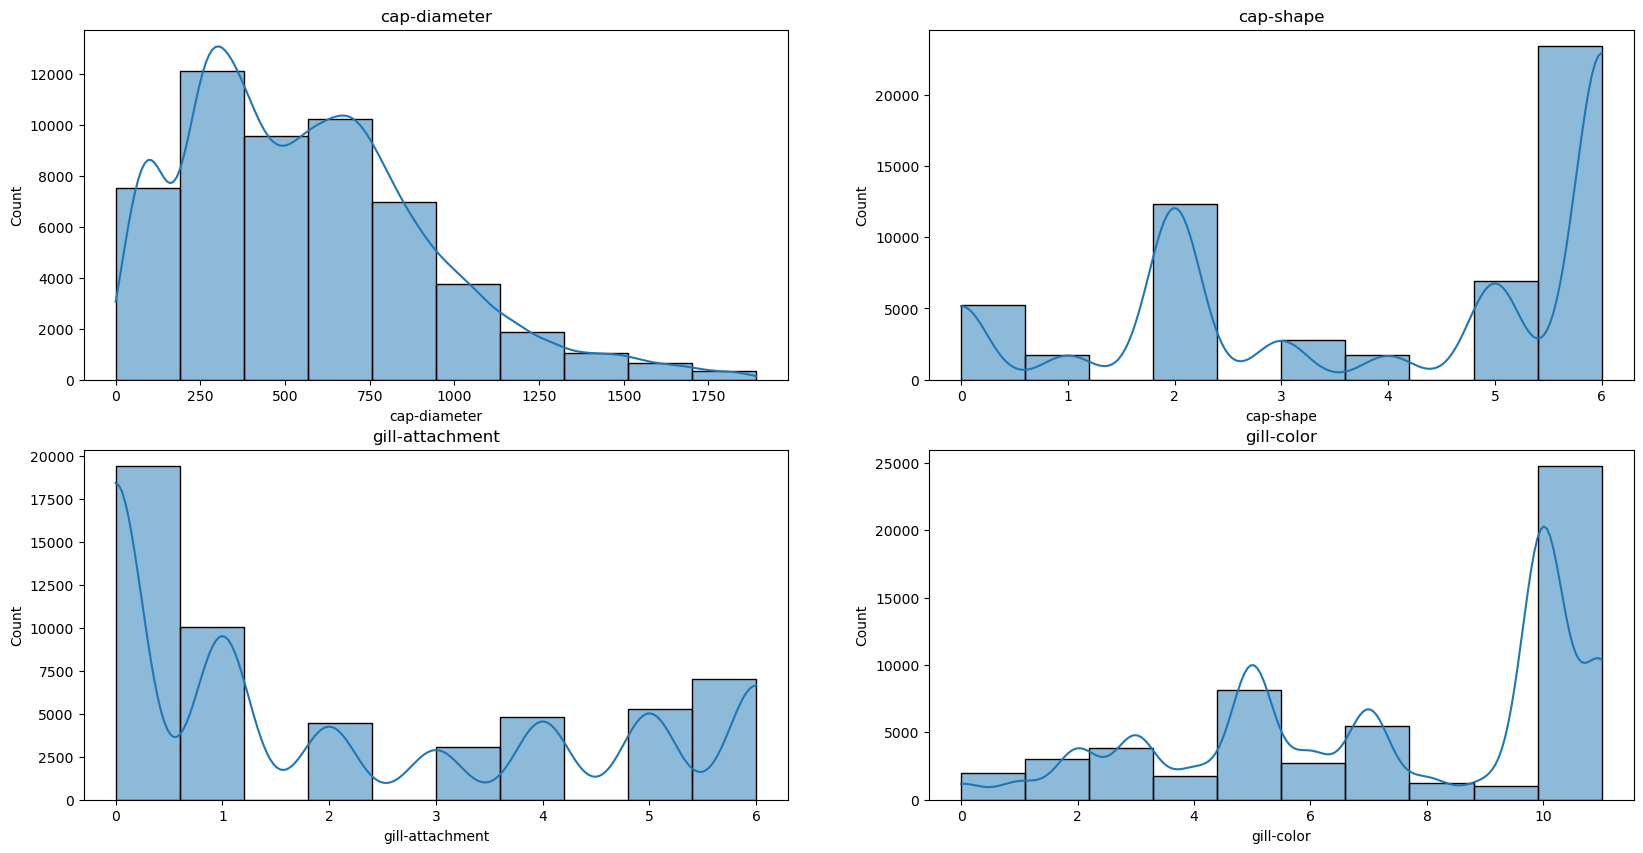

In [43]:
# ploting histogram to check the distribution of data is uniform or not...
# Set the figure size
plt.figure(figsize=(20, 10))

# Loop through each column and plot histogram with KDE
for i, col in enumerate(df.columns):
    plt.subplot(2, 2, i + 1)  # Create subplots
    sns.histplot(data=df[col], kde=True, bins=10)  # Plot histogram with KDE
    plt.title(col)  # Set subplot title

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

From above histograms there is no data having uniform distributions..all are skewwed or irregular in distribution

In [30]:
#As there are no trends observed during visualization...im proceding to split my data into X and Y and appliying standard scalar

X = df.drop(['class'],axis = 1)
X.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season
0,1372,2,2,10,3.807467,1545,11,1.804273
1,1461,2,2,10,3.807467,1557,11,1.804273
2,1371,2,2,10,3.612496,1566,11,1.804273
3,1261,6,2,10,3.787572,1566,11,1.804273
4,1305,6,2,10,3.711971,1464,11,0.943195


In [31]:
Y = df['class']
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [48]:
Y.value_counts()

class
1    29675
0    24360
Name: count, dtype: int64

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)
X

array([[ 2.23613935, -0.92586356, -0.06373657, ...,  0.63157015,
         0.79150827,  2.78840159],
       [ 2.48344371, -0.92586356, -0.06373657, ...,  0.64691446,
         0.79150827,  2.78840159],
       [ 2.23336064, -0.92586356, -0.06373657, ...,  0.65842269,
         0.79150827,  2.78840159],
       ...,
       [-1.34838452,  0.46271335,  0.38493533, ..., -0.59725336,
         1.09806419, -0.20849016],
       [-1.35672062, -0.92586356,  0.38493533, ..., -0.71617177,
         1.09806419, -0.20849016],
       [-1.37617152,  0.46271335,  0.38493533, ..., -0.71489307,
         1.09806419, -0.20849016]])

In [34]:
# now splitting the data
from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42, shuffle = True)


!)Appliying KNN algorithm first

In [44]:
from sklearn.neighbors import KNeighborsClassifier
KNNClassifierModel = KNeighborsClassifier(n_neighbors= 10,weights ='uniform', # it can be distance
algorithm='auto') # it can be ball_tree, kd_tree,brute
KNNClassifierModel.fit(X_train, Y_train)
print('KNNClassifierModel Train Score is : ' , KNNClassifierModel.score(X_train, Y_train))
print('KNNClassifierModel Test Score is : ' , KNNClassifierModel.score(X_test, Y_test))

KNNClassifierModel Train Score is :  0.9875211505922166
KNNClassifierModel Test Score is :  0.9876010116587502


In [45]:
prediction=KNNClassifierModel.predict(X_test)
from sklearn import metrics
print(metrics.classification_report(Y_test, prediction))
print(metrics.confusion_matrix(Y_test, prediction))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7349
           1       0.99      0.99      0.99      8862

    accuracy                           0.99     16211
   macro avg       0.99      0.99      0.99     16211
weighted avg       0.99      0.99      0.99     16211

[[7251   98]
 [ 103 8759]]


In [47]:
print("accuracy:",metrics.accuracy_score(Y_test,prediction))

accuracy: 0.9876010116587502


2)Logistic regression

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
log = LogisticRegression()
log.fit(X_train, Y_train)

LogisticRegression()

In [51]:
Y_pred = log.predict(X_test)

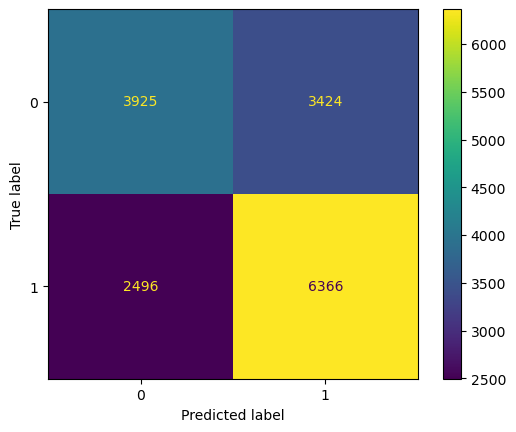

In [52]:
# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred);

In [53]:
# classification report

from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.61      0.53      0.57      7349
           1       0.65      0.72      0.68      8862

    accuracy                           0.63     16211
   macro avg       0.63      0.63      0.63     16211
weighted avg       0.63      0.63      0.63     16211



In [54]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test, Y_pred)

0.634815865770156

So Logistic regression didnt give much good performance

3)decision Trees

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
# make an object of it

dtc = DecisionTreeClassifier(random_state= 42)

In [57]:
dtc.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [60]:
Y_pred = dtc.predict(X_test)

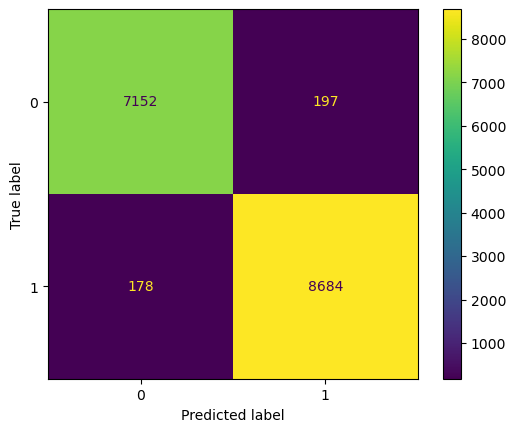

In [61]:
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred)

In [62]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      7349
           1       0.98      0.98      0.98      8862

    accuracy                           0.98     16211
   macro avg       0.98      0.98      0.98     16211
weighted avg       0.98      0.98      0.98     16211



In [63]:
accuracy_score(Y_test, Y_pred)

0.9768675590648325

In [64]:
feature_imp = dtc.feature_importances_

In [65]:
feature_imp

array([0.08419978, 0.06383981, 0.16928503, 0.15618021, 0.12934872,
       0.21092488, 0.15272547, 0.0334961 ])

AttributeError: 'numpy.ndarray' object has no attribute 'coulmns'

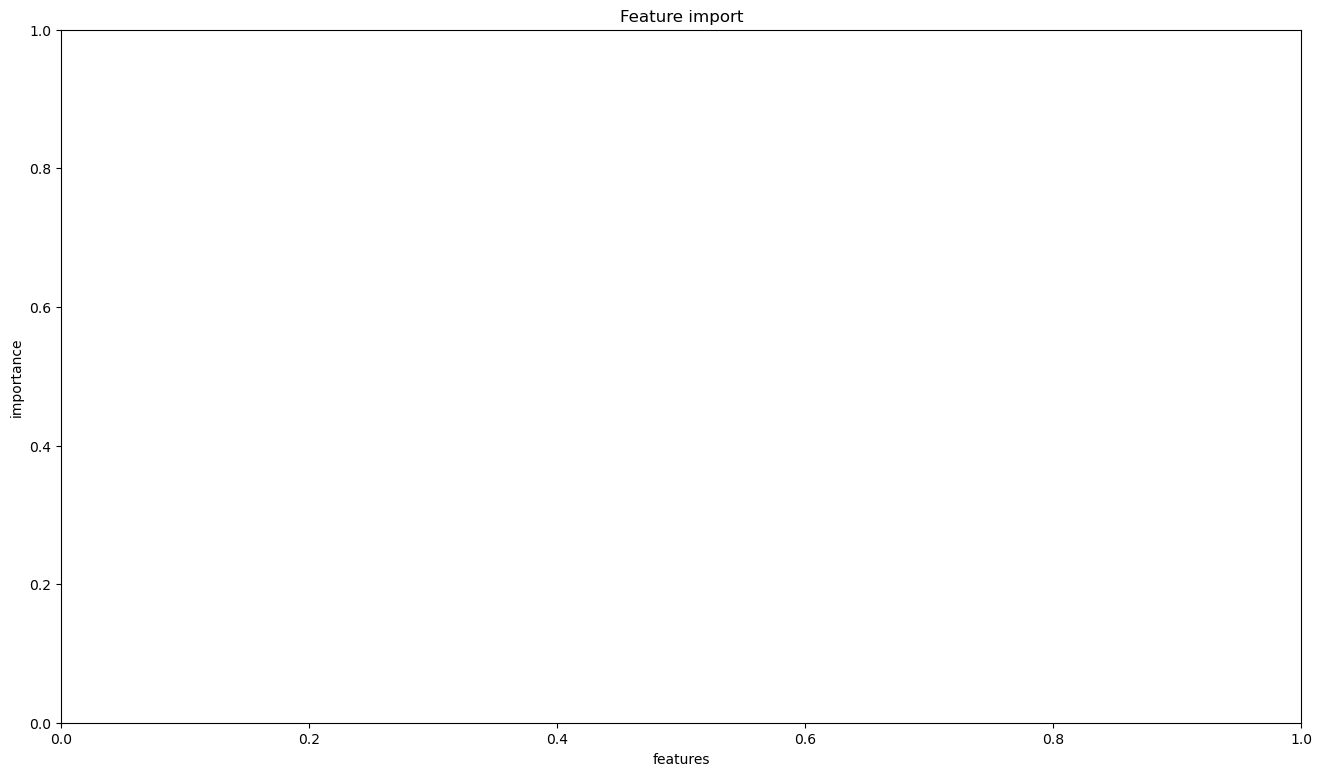

In [69]:
plt.figure(figsize=(16,9))
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Feature import')
plt.bar(X.coulmns, feature_imp * 100, color = 'black')


Grid Search on Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [71]:
# parameter grid

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1,2,4],
    'bootstrap': [True, False]
}

In [72]:
rf = RandomForestClassifier()

grid = GridSearchCV(estimator= rf, param_grid=param_grid, cv=5, verbose = 1, scoring = 'accuracy', n_jobs= -1)

In [73]:
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1, param_grid={},
             scoring='accuracy', verbose=1)

In [77]:
Y_pred = grid.predict(X_test)

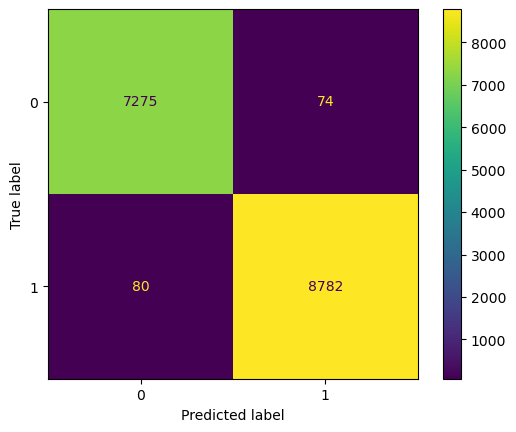

In [78]:
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred);

In [79]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7349
           1       0.99      0.99      0.99      8862

    accuracy                           0.99     16211
   macro avg       0.99      0.99      0.99     16211
weighted avg       0.99      0.99      0.99     16211



In [80]:
accuracy_score(Y_test, Y_pred)

0.9905002775892913

In [81]:
grid.best_estimator_

RandomForestClassifier()

Accuracy scores: after triying these 4 classification types on this musshroom dataset

KNN classsifier =>  0.9876010116587502

logistic regression => 0.6365318774868141

decision tree => : 0.978532432682520

grid search + random forest => 0.9912094013139632

Neural Network

In [82]:
from sklearn.neural_network import MLPClassifier

In [83]:
mlp_classifier = MLPClassifier(hidden_layer_sizes=(128,64,64), max_iter=1000)

In [84]:
mlp_classifier.fit(X_train, Y_train)

MLPClassifier(hidden_layer_sizes=(128, 64, 64), max_iter=1000)

In [85]:
Y_pred = mlp_classifier.predict(X_test)

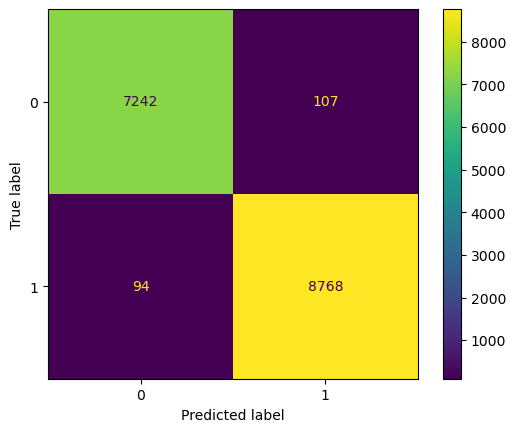

In [86]:
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred);

In [87]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7349
           1       0.99      0.99      0.99      8862

    accuracy                           0.99     16211
   macro avg       0.99      0.99      0.99     16211
weighted avg       0.99      0.99      0.99     16211



In [88]:
accuracy_score(Y_test, Y_pred)

0.9876010116587502